In [1]:
import xarray as xr
from dask_jobqueue import PBSCluster
from dask.distributed import Client

# Spin up a little cluster with `dask-jobqueue`

### Specs for an individual worker

In [2]:
walltime = '00:10:00'
cores = 1
memory = '4GB'

cluster = PBSCluster(walltime=str(walltime), cores=cores, memory=str(memory),
                     job_extra=['-l ncpus='+str(cores),'-l mem='+str(memory),
                                '-l storage=gdata/v14+scratch/v14'],
                     header_skip=["select"])

### Scale up to n workers

In [3]:
cluster.scale(1)

In [4]:
client = Client(cluster)
client

Client Scheduler: tcp://10.6.54.57:36461 Dashboard: http://10.6.54.57:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


# Do something with the cluster

In [11]:
test = xr.open_zarr('/scratch/v14/ds0092/CAFE/forecasts/f_ALCG_test/c5-d60-pX-f_ALCG_test-20181101/atmos_isobaric_daily.zarr',
                    consolidated=True)

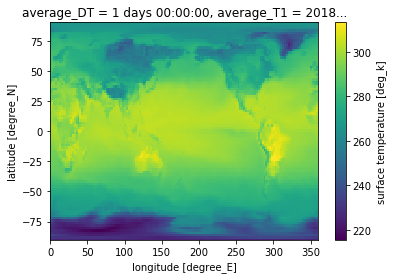

In [28]:
test['t_surf'].isel(ensemble=0, time=0).plot()